This work was done by YK and PM.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
import scipy.stats as sp

# A05.1 Everyday networks are not Poisson: parameter estimation and model selection

In [3]:
# Read the datasets
import os

def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        allFiles.append(entry)
    return allFiles

myfiles = getListOfFiles('./data-assignment5')
myfiles

['graph_amazon.gml', 'graph_escort.gml', 'graph_internet.gml']

In [4]:
# Average degree
def average_degree(graph):
    sum = 0
    for node in graph.degree():
        sum = node[1] + sum
    return sum/len(graph.degree())

# Poisson distribution
def poisson_dstr(x, mu):
    p = []
    degree = sorted(list(set(x)))
    for i in range(len(degree)):
        p.append(sp.poisson.pmf(degree[i], mu))
    return degree, p

# Exponential distribution
def exponential_dstr(x, mu):
    p = []
    for i in range(len(x)):
        p.append((mu**-1)*np.exp(-x[i]/mu))
    return x, p


def myfunc(x,alpha):
    return x**(-alpha)

Calculating best minimal value for power law fit
Power-law exponent 𝛾 (=𝛼) of the degree distribution P(k)~k^(-𝛾): 3.581389902353215
Corresponding error σ: 0.033493488557519914
Average degree: 5.529855493141971


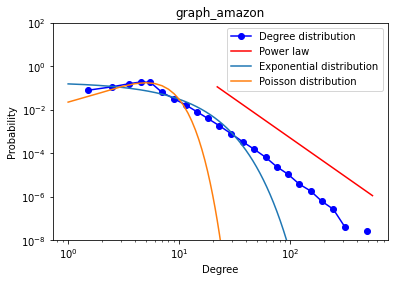

Calculating best minimal value for power law fit
Power-law exponent 𝛾 (=𝛼) of the degree distribution P(k)~k^(-𝛾): 2.8703860553637544
Corresponding error σ: 0.07579186776002865
Average degree: 4.667543335325762


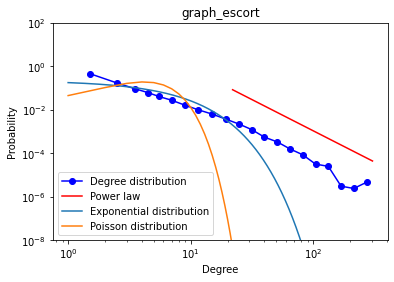

Calculating best minimal value for power law fit
Power-law exponent 𝛾 (=𝛼) of the degree distribution P(k)~k^(-𝛾): 1.9157988569314632
Corresponding error σ: 0.013180032052154154
Average degree: 6.197750352406432


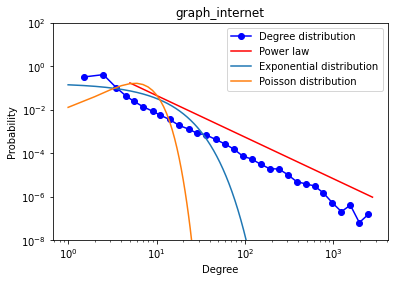

In [5]:
# Task: For all given networks, compute the degree distribution P(k) & the average degree <k> and use the powerlaw package to fit P(k).
for i in range(len(myfiles)) : 
    g = nx.read_gml('./data-assignment5/' + myfiles[i])
    # We create an array with all degrees
    p_k = np.sort(np.asarray([d for d in dict(g.degree()).values()]), )
    fit = powerlaw.Fit(p_k, discrete=True)

    # 1. Compute the power-law exponent r of the degree distribution P(k)~k^(-r) and the corresponding error
    alpha = fit.power_law.alpha # alpha == gamma
    sigma = fit.power_law.sigma # sigma: standard error
    
    print("Power-law exponent 𝛾 (=𝛼) of the degree distribution P(k)~k^(-𝛾):", alpha)
    print("Corresponding error σ:", sigma)

    # 2. In the same plot show the empirical degree distribution; the power-law fit; 
    # the Poisson fit and the exponential distribution w/ mean value equal to <k>.
    k = average_degree(g)
    print("Average degree:", k)
    deg, pois = poisson_dstr(p_k, k)
    spacing = np.linspace(min(p_k),max(p_k),len(p_k))
    space, expo = exponential_dstr(spacing, k)

    #plot
    powerlaw.plot_pdf(p_k,color='b',marker='o', label='Degree distribution')
    fit.power_law.plot_pdf(color='r', label='Power law')
    plt.plot(space, expo, label='Exponential distribution')
    plt.plot(deg, pois, label='Poisson distribution')
    
    plt.legend()
    plt.title(myfiles[i].split('.')[0])
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.ylim([10**-8, 100])
    
    plt.show()

`````
Which distrubution is more likely to describe the data?
``````
The powerlaw is more likely to describe the data as its direction and the gradient is similar to the real degree distribution.

`````
What does it mean in practice for Amazon products?
`````
In the graph_amazon, the majority of amazon products, which are represented in nodes, are less likely to co-purchased together. These nodes are important disconnected hubs.

# A05.2 Barabási-Albert model
Task: Build networks with the Barabási-Albert model.
Connect 𝑚 = 3 for each new node and grow until
𝑁 = 50, 100, 500, 1000, 5000.

1. Compute the average clustering coefficient, assortativity, average shortest path length and diameter for the generated networks
2. Produce randomised versions of the same networks and calculate the same quantities, then plot them as functions of 𝑁 and compare with the non-randomised ones (use log x axis)

In [6]:
m = 3
N = [50, 100, 500, 1000, 5000]

avg_clust = []
avg_clust_rnd = []

assort = []
assort_rnd = []

avg_short_path = []
avg_short_path_rnd = []

diam = []
diam_rnd = []

for i, n in enumerate(N):
    print("Growing network to %s nodes..." % n)
    
    g = nx.barabasi_albert_graph(n, m)
    grnd = nx.algorithms.smallworld.random_reference(g.copy(), niter = 50, connectivity=False)
    
    avg_clust.append(nx.average_clustering(g))
    avg_clust_rnd.append(nx.average_clustering(grnd))
    
    assort.append(nx.degree_assortativity_coefficient(g))
    assort_rnd.append(nx.degree_assortativity_coefficient(grnd))
    
    avg_short_path.append(nx.average_shortest_path_length(g))
    avg_short_path_rnd.append(nx.average_shortest_path_length(grnd))
    
    diam.append(nx.algorithms.distance_measures.diameter(g))
    diam_rnd.append(nx.algorithms.distance_measures.diameter(grnd))
    
    print("Network grown to %s nodes" % n)


Growing network to 50 nodes...
Network grown to 50 nodes
Growing network to 100 nodes...
Network grown to 100 nodes
Growing network to 500 nodes...
Network grown to 500 nodes
Growing network to 1000 nodes...
Network grown to 1000 nodes
Growing network to 5000 nodes...
Network grown to 5000 nodes


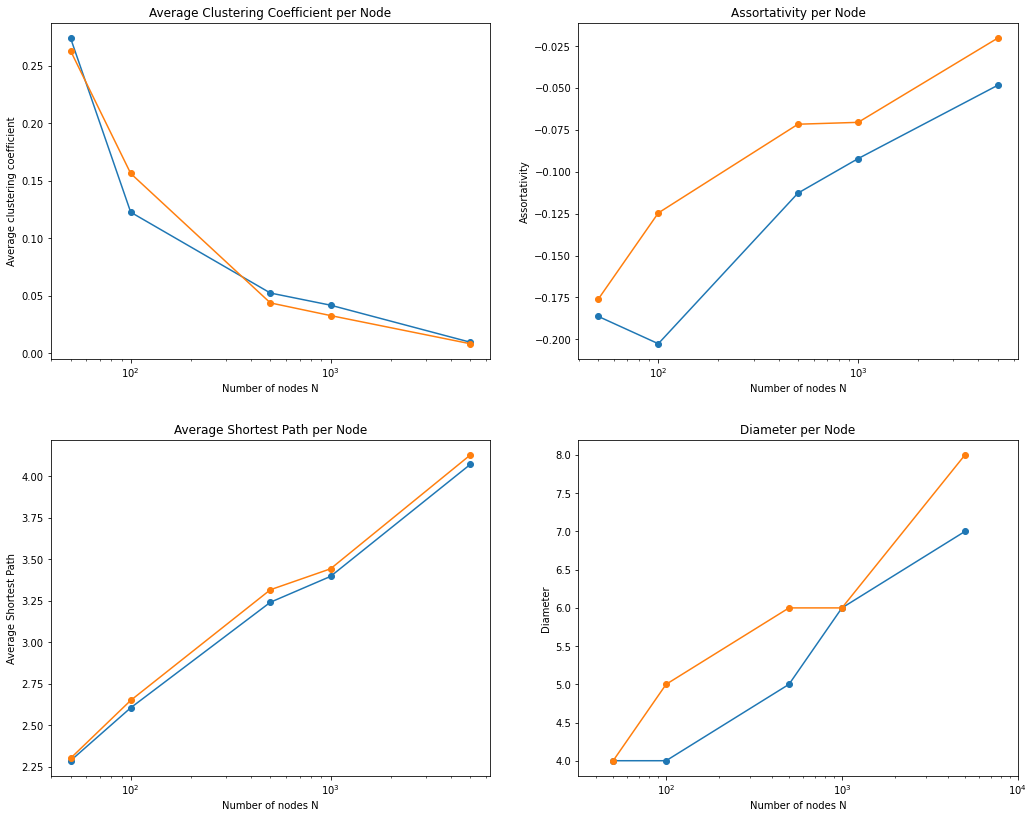

In [7]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 12))

ax1.plot(N, avg_clust, marker = 'o')
ax1.plot(N, avg_clust_rnd, marker = 'o')
ax1.set_title('Average Clustering Coefficient per Node')
ax1.set_xscale('log')
ax1.set_xlabel("Number of nodes N")
ax1.set_ylabel("Average clustering coefficient")

ax2.plot(N, assort, marker = 'o')
ax2.plot(N, assort_rnd, marker = 'o')
ax2.set_title('Assortativity per Node')
ax2.set_xscale('log')
ax2.set_xlabel("Number of nodes N")
ax2.set_ylabel("Assortativity")

ax3.plot(N, avg_short_path, marker = 'o')
ax3.plot(N, avg_short_path_rnd, marker = 'o')
ax3.set_title('Average Shortest Path per Node')
ax3.set_xscale('log')
ax3.set_xlabel("Number of nodes N")
ax3.set_ylabel("Average Shortest Path")

ax4.plot(N, diam, marker = 'o')
ax4.plot(N, diam_rnd, marker = 'o')
ax4.set_title('Diameter per Node')
ax4.set_xscale('log')
ax4.set_xlabel("Number of nodes N")
ax4.set_ylabel("Diameter")
ax4.set_xlim([10**1.5, 10**4])

fig.tight_layout(pad=3.0)
plt.show()

3. Which of these measures is relatively unchanged by randomisation? Why? 

As one can see in the scatterplots, the average clustering coefficients and average shortest paths essentially remain stable under randomization. It is primarily due to the fact that node degrees are preserved with randomization. Furthermore, a Barabási-Albert network contains a few nodes that possess a high number of connections. Their number remains the same, and they're relatively centered. Due to this, both clustering and the shortest paths also remain relatively unchanged.

# A05.3 Barabási-Albert model (2)
Task: Build networks of 𝑁 = 500 nodes with the BA model,
varying the number of new connections 𝑚 ∈ {2, 3, 4, 5}.

In [19]:
N = 500
m_list = [2, 3, 4, 5]

BA_networks = []
alphas = []
sigmas = []

for m in m_list:
    g = nx.barabasi_albert_graph(N, m)
    BA_networks.append(g)
    
    p_k = np.sort(np.asarray([d for d in dict(g.degree()).values()]), )
    fit = powerlaw.Fit(p_k, discrete = True)
    
    alpha = fit.power_law.alpha # alpha == gamma
    alphas.append(alpha)
    
    sigma = fit.power_law.sigma # sigma: standard error
    sigmas.append(sigma)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


1. Plot the degree distributions of the resulting networks

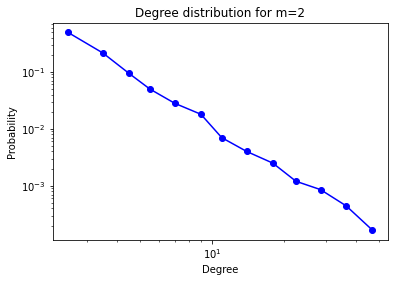

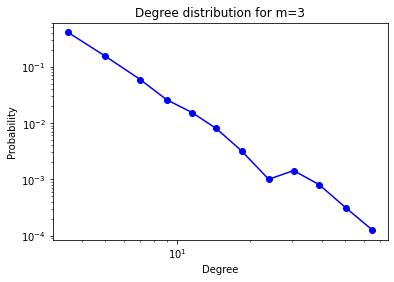

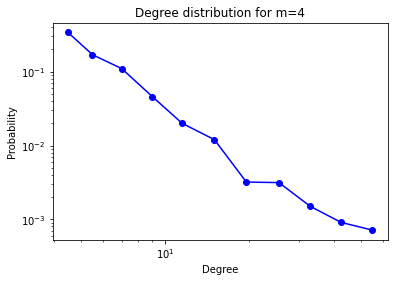

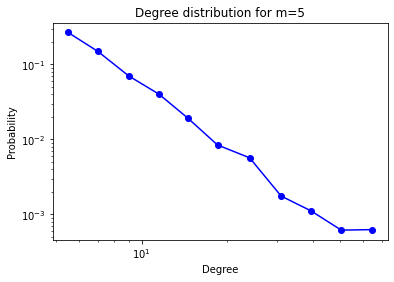

In [20]:
for i, g in enumerate(BA_networks):
    p_k = np.sort(np.asarray([d for d in dict(g.degree()).values()]), )
    powerlaw.plot_pdf(p_k, color='b', marker='o', label='Degree distribution')
    plt.title('Degree distribution for m={}'.format(m_list[i]))
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.show()

2. Estimate the power-law fit parameters

In [21]:
for i, alpha in enumerate(alphas):
    print("Estimated power-law fit parameters for a Barabási-Albert (N=500) and m=%s." % m_list[i])
    print("Power-law exponent 𝛾 (=𝛼):", alpha)
    print("Corresponding error σ:", sigmas[i])
    print("")

Estimated power-law fit parameters for a Barabási-Albert (N=500) and m=2.
Power-law exponent 𝛾 (=𝛼): 2.5637672315792677
Corresponding error σ: 0.09811948273392386

Estimated power-law fit parameters for a Barabási-Albert (N=500) and m=3.
Power-law exponent 𝛾 (=𝛼): 2.6355072381297027
Corresponding error σ: 0.09490175543739865

Estimated power-law fit parameters for a Barabási-Albert (N=500) and m=4.
Power-law exponent 𝛾 (=𝛼): 2.6593476117361665
Corresponding error σ: 0.07420828116287992

Estimated power-law fit parameters for a Barabási-Albert (N=500) and m=5.
Power-law exponent 𝛾 (=𝛼): 2.815038065703674
Corresponding error σ: 0.10789281390862564



3. Plot the power-law exponent 𝛼 as a function of 𝑚

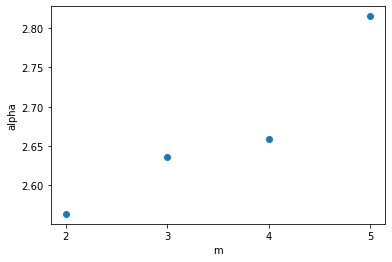

In [23]:
plt.scatter(m_list, alphas)
plt.xlabel("m")
plt.ylabel("alpha")
plt.xticks(m_list)
plt.show()